In [1]:
from dl_toolbox.lightning_datamodules import *

/work/OT/ai4usr/fournip/vre_venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
dm = SplitfileSup(
    splitfile_path='/home/eh/fournip/ai4geo/splits/Biarritz.csv',
    train_folds=(1,2),
    test_folds=(3,4),
    data_path='/work/OT/ai4geo/DATA/DATASETS/DIGITANIE',
    epoch_len=100,
    sup_batch_size=4,
    workers=0,
    img_aug='no',
    crop_size=512,
    crop_step=512,
    labels='6'
)

Warning 1: Unable to save auxiliary information in /work/OT/ai4geo/DATA/DATASETS/DIGITANIE/Biarritz/Biarritz_EPSG32630_1.tif.aux.xml.
Warning 1: Unable to save auxiliary information in /work/OT/ai4geo/DATA/DATASETS/DIGITANIE/Biarritz/Biarritz_EPSG32630_2.tif.aux.xml.
Warning 1: Unable to save auxiliary information in /work/OT/ai4geo/DATA/DATASETS/DIGITANIE/Biarritz/Biarritz_EPSG32630_3.tif.aux.xml.
Warning 1: Unable to save auxiliary information in /work/OT/ai4geo/DATA/DATASETS/DIGITANIE/Biarritz/Biarritz_EPSG32630_4.tif.aux.xml.


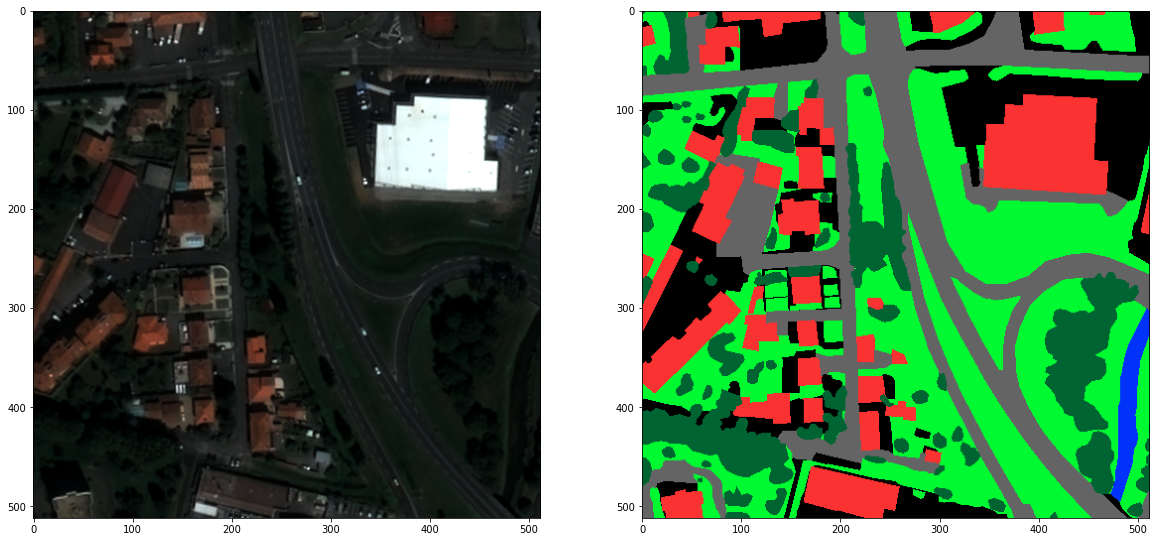

In [15]:
import matplotlib.pyplot as plt 
import numpy as np
from skimage import exposure
dataloader = dm.train_dataloader()
fig = plt.figure(figsize=(20,20))
for batch in dataloader:

    img = batch['image'][0].numpy().transpose(1,2,0)
    p2, p98 = np.percentile(img, (2, 98))
    img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))
    labels = batch['mask'][0].numpy()
    ax1 = fig.add_subplot(121)
    ax1.imshow(img_rescale)
    ax2 = fig.add_subplot(122)
    ax2.imshow(dm.train_set.datasets[0].labels_to_rgb(labels))
    break
